## Replicating Ashraf, Karlan and Yin (2006) 
**"Tying Odysseus to the Mast: Evidence from a Commitment Savings Product in the Philippines,"** *Quarterly Journal of Economics.*

What follows are notes on the replication files for this paper (available from Harvard Dataverse).  This is written in a jupyter notebook using the ipystata python library which basically allows us to run stata code.

In what follows I have reproduced only parts of the analysis from the following do files:
 - [SEED.QJEtable.impact.do](AKY06\SEED.QJEtable.impact.do)  
 - [SEED.QJEtables.takeup.do](AKY06\SEED.QJEtables.takeup.do)  

**Opening the datasets**

One disadvantage of proprietary software like Stata is that you often cannot open a dataset saved with a later version of the software unless you pay to upgrade the software.  The datasets seem to have been saved as Stata 13 but (separately) I've used the stata saveold command to save them as Stata 11 datasets to be more widely available.  Analysis that follows opens these version11 files.

In [1]:
import ipystata

## Observations about the datasets

These are the original datasets. They have non-obvious names:

 - **seedanalysis_011204_1.dta**: -- Six month impacts

 - **seedanalysis_011204_080404_1.dta**:  -- Twelve month impacts

 - **seedanalysis_080404_1.dta**: -- not sure yet..

The dataset has 3153 observations but the baseline survey appears to have been administered to only 1777 (if call==1)

In [4]:
%%stata
cd G:\GC\Dev-II\notebooks
set mem 200m
use AKY06\seedanalysis_011204_080404_1_v11.dta

tab group
tab group if treatment !=.


G:\GC\Dev-II\notebooks
(204800k)

      group |      Freq.     Percent        Cum.
------------+-----------------------------------
          C |        809       25.66       25.66
          M |        776       24.61       50.27
          T |      1,568       49.73      100.00
------------+-----------------------------------
      Total |      3,153      100.00

      group |      Freq.     Percent        Cum.
------------+-----------------------------------
          C |        469       26.39       26.39
          M |        466       26.22       52.62
          T |        842       47.38      100.00
------------+-----------------------------------
      Total |      1,777      100.00


## Table 6: Impact 

### OLS 6 months
Note that the 6 months data is in the file:
AKY06\seedanalysis_011204_1.dta

In [5]:
%%stata
use AKY06\seedanalysis_011204_1_v11.dta
xi: reg balchange treatment marketing, robust
xi: reg balchange treatment if (treatment == 1 | marketing == 1), robust


Linear regression                                      Number of obs =    1777
                                                       F(  2,  1774) =    2.90
                                                       Prob > F      =  0.0553
                                                       R-squared     =  0.0018
                                                       Root MSE      =  2293.2

------------------------------------------------------------------------------
             |               Robust
   balchange |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   234.6785   101.7479     2.31   0.021     35.12004     434.237
   marketing |   184.8506   146.9815     1.26   0.209    -103.4246    473.1257
       _cons |   40.62573   61.67617     0.66   0.510    -80.33988    161.5913
------------------------------------------------------------------------------

Linear regres

### OLS 12 months
Note that the 12 months data is in the file:
AKY06\seedanalysis_011204_080404_1.dta

In [4]:
%%stata
use AKY06\seedanalysis_011204_080404_1_v11.dta

xi: reg balchange treatment marketing, robust

xi: reg balchange treatment if (treatment == 1 | marketing == 1), robust


Linear regression                               Number of obs     =      1,777
                                                F(2, 1774)        =       1.43
                                                Prob > F          =     0.2398
                                                R-squared         =     0.0016
                                                Root MSE          =       4528

------------------------------------------------------------------------------
             |               Robust
   balchange |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   411.4664   244.0205     1.69   0.092    -67.13149    890.0644
   marketing |    123.891   153.4397     0.81   0.420    -177.0506    424.8327
       _cons |     65.183   124.2152     0.52   0.600    -178.4406    308.8066
------------------------------------------------------------------------------

Linear regres

In the analysis that follows e(sample)==1 restricts the calculations to the sample that was used in the lsat regression and \_result(3) refers to the mean of hh_inc

In [5]:
%%stata

xi: reg balchange treatment marketing, robust
    
**economic impact #1: % of hh_inc 
summ hh_inc if e(sample)==1
disp _b[treatment] / (_result(3)*10000)

**economic impact #2: % of prior balance
summ totbal if e(sample)==1
disp _b[treatment] / (_result(3)/100)


Linear regression                               Number of obs     =      1,777
                                                F(2, 1774)        =       1.43
                                                Prob > F          =     0.2398
                                                R-squared         =     0.0016
                                                Root MSE          =       4528

------------------------------------------------------------------------------
             |               Robust
   balchange |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   411.4664   244.0205     1.69   0.092    -67.13149    890.0644
   marketing |    123.891   153.4397     0.81   0.420    -177.0506    424.8327
       _cons |     65.183   124.2152     0.52   0.600    -178.4406    308.8066
------------------------------------------------------------------------------
. **economic i

### Probit regressions

In [6]:
%%stata
xi: dprobit frac_change_00 treatment marketing, robust
xi: dprobit frac_change_00 treatment if (treatment == 1 | marketing == 1), robust
xi: dprobit frac_change_20 treatment marketing, robust
xi: dprobit frac_change_20 treatment  if (treatment == 1 | marketing == 1), robust


Iteration 0:   log pseudolikelihood = -1072.4045
Iteration 1:   log pseudolikelihood = -1064.6708
Iteration 2:   log pseudolikelihood = -1064.6667

Probit regression, reporting marginal effects           Number of obs =   1777
                                                        Wald chi2(2)  =  15.34
                                                        Prob > chi2   = 0.0005
Log pseudolikelihood = -1064.6667                       Pseudo R2     = 0.0072

------------------------------------------------------------------------------
         |               Robust
frac~_00 |      dF/dx   Std. Err.      z    P>|z|     x-bar  [    95% C.I.   ]
---------+--------------------------------------------------------------------
treatm~t*|   .1021901   .0266729     3.82   0.000   .473832   .049912  .154468
market~g*|   .0482741   .0314653     1.56   0.119    .26224  -.013397  .109945
---------+--------------------------------------------------------------------
  obs. P |   .2915025
 pred.

### Quantile Regressions

#### 6 months

In [7]:
%%stata
use AKY06\seedanalysis_011204_080404_1_v11.dta
sqreg balchange treatment marketing, q(.1 .2 .3 .4 .5 .6 .7 .8 .9)

sqreg balchange treatment if (treatment == 1 | marketing == 1), q(.1 .2 .3 .4 .5 .6 .7 .8 .9)


(fitting base model)

Bootstrap replications (20)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
....x.x....x..x.....x....

Simultaneous quantile regression                    Number of obs =      1,777
  bootstrap(20) SEs                                 .10 Pseudo R2 =     0.0089
                                                    .20 Pseudo R2 =     0.0004
                                                    .30 Pseudo R2 =     0.0029
                                                    .40 Pseudo R2 =     0.0011
                                                    .50 Pseudo R2 =     0.0012
                                                    .60 Pseudo R2 =     0.0006
                                                    .70 Pseudo R2 =     0.0002
                                                    .80 Pseudo R2 =     0.0015
                                                    .90 Pseudo R2 =     0.0051

------------------------------------------------------------------------------


#### 12 months

In [8]:
%%stata
use AKY06\seedanalysis_011204_080404_v11.dta, clear
sqreg balchange treatment marketing, q(.1 .2 .3 .4 .5 .6 .7 .8 .9)
sqreg balchange treatment if (treatment == 1 | marketing == 1), q(.1 .2 .3 .4 .5 .6 .7 .8 .9)


file AKY06\seedanalysis_011204_080404_v11.dta not found
r(601);
(fitting base model)

Bootstrap replications (20)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
....x..x...x.....xx.....xx.

Simultaneous quantile regression                    Number of obs =      1,777
  bootstrap(20) SEs                                 .10 Pseudo R2 =     0.0089
                                                    .20 Pseudo R2 =     0.0004
                                                    .30 Pseudo R2 =     0.0029
                                                    .40 Pseudo R2 =     0.0011
                                                    .50 Pseudo R2 =     0.0012
                                                    .60 Pseudo R2 =     0.0006
                                                    .70 Pseudo R2 =     0.0002
                                                    .80 Pseudo R2 =     0.0015
                                                    .90 Pseudo R2 =     0.0051

-------------

## Table VIII: ITT effect of subgroups
### 12 months

In [9]:
%%stata
xi: reg balchange treatment marketing female female_treat, robust 
xi: reg balchange treatment marketing active active_treat, robust
xi: reg balchange treatment marketing edhi edhi_treat, robust
xi: reg balchange treatment marketing hi_hh_inc hi_hh_inc_treat, robust
xi: reg balchange treatment marketing hyper_mon_new2 hyper_mon_new2_treat, robust
xi: reg balchange treatment marketing silly_mon_new2 silly_mon_new2_treat, robust


Linear regression                               Number of obs     =      1,777
                                                F(4, 1772)        =       1.98
                                                Prob > F          =     0.0948
                                                R-squared         =     0.0022
                                                Root MSE          =     4529.2

------------------------------------------------------------------------------
             |               Robust
   balchange |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   treatment |   680.2893     420.26     1.62   0.106     -143.968    1504.547
   marketing |   137.2044   150.0914     0.91   0.361    -157.1704    431.5792
      female |   192.9631   135.0963     1.43   0.153    -72.00175    457.9279
female_treat |  -443.4216    483.559    -0.92   0.359    -1391.828    504.9845
       _cons |

There is a lot more to the impact results in the original do file.... but for now the analysis here turns to the takeup questions:


## TAKEUP

In [15]:
%%stata

use AKY06\seedanalysis_011204_080404_1_v11.dta, clear
gen control = 1 if group == "C"
replace control = 0 if control ==.
macro define GB "GBloan GBloandefault"
macro define fullset "married edhi numhh unemployed age $GB hh_inc hh_inc2"
macro define fullset_noGB "married edhi numhh unemployed age hh_inc hh_inc2"

gen dormant_new = 1- active
drop dormant
rename dormant_new dormant
replace totbal = totbal/100
replace newtotbal = newtotbal/100
gen dist_GB = dbutuan if butuan ==1
replace dist_GB = dampayon if ampayon == 1
destring pop, ignore(",") replace
gen brgy_penetration = no_clients /pop
bysort brgy: egen sd_totbal = sd(totbal)
bysort brgy: egen mean_totbal = mean(totbal)


(2344 missing values generated)
(2344 real changes made)
(2839 real changes made)
(2193 real changes made)
(762 missing values generated)
(762 real changes made)
pop: characters , removed; replaced as int


In [7]:
%%stata
tab active if call==1,summ(totbal)


            |  Summary of Client savings balance
     Active |             (hundreds)
    account |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   483.12239   498.52538        1145
          1 |    556.2335    513.2936         632
------------+------------------------------------
      Total |   509.12477   504.89831        1777


## Table 1: Savings Goals

In [8]:
%%stata
tab goal_category if seedtakeup==1
tab goal_type if seedtakeup==1
tab box if seedtakeup==1


                    Savings goal |      Freq.     Percent        Cum.
---------------------------------+-----------------------------------
Agricultural Financing/Investing |          4        2.04        2.04
            Capital for Business |         20       10.20       12.24
Christmas/Birthday/Celebration/G |         95       48.47       60.71
                       Education |         41       20.92       81.63
House/Lot construction and purch |         20       10.20       91.84
                         Medical |          1        0.51       92.35
  Personal Needs/Future Expenses |          3        1.53       93.88
Purchase or Maintenance of Machi |          8        4.08       97.96
                 Vacation/Travel |          4        2.04      100.00
---------------------------------+-----------------------------------
                           Total |        196      100.00

    Type of |
    savings |
       goal |      Freq.     Percent        Cum.
------------+----------

## Table II: Summary Statistics

In [24]:
%%stata
tab call


                 Result of call |      Freq.     Percent        Cum.
--------------------------------+-----------------------------------
                      completed |      1,777      100.00      100.00
--------------------------------+-----------------------------------
                          Total |      1,777      100.00


### Panel A

In [22]:
%%stata
tabstat totbal active if call==1, by(group) stats(mean sem)
reg totbal treatment control if call ==1
reg active treatment control if call ==1
sort brgy
tabstat dist_GB brgy_penetration sd_totbal mean_totbal pop if call==1, by(group) stats(mean sem)
reg dist_GB treatment control if call ==1
reg brgy_penetration treatment control if call ==1
reg sd_totbal treatment control if call ==1
reg mean_totbal treatment control if call ==1
reg pop treatment control if call ==1


Summary statistics: mean, se(mean)
  by categories of: group 

 group |    totbal    active
-------+--------------------
     C |  530.7378  .3603412
       |  23.38712  .0221926
-------+--------------------
     M |  499.0084  .3626609
       |  23.50222  .0222951
-------+--------------------
     T |   502.685  .3491686
       |  17.33115  .0164382
-------+--------------------
 Total |  509.1248  .3556556
       |  11.97734  .0113593
----------------------------

      Source |       SS           df       MS      Number of obs   =     1,777
-------------+----------------------------------   F(2, 1774)      =      0.59
       Model |  301690.551         2  150845.275   Prob > F        =    0.5536
    Residual |   452440317     1,774  255039.638   R-squared       =    0.0007
-------------+----------------------------------   Adj R-squared   =   -0.0005
       Total |   452742008     1,776  254922.302   Root MSE        =    505.01

------------------------------------------------------

### Panel B

In [17]:
%%stata
tabstat yearsed female age impatient_mon01 hyper_mon_new2 if call==1, by(group) stats(mean sem) 
reg yearsed treatment control if call ==1
reg female treatment control if call ==1
reg age treatment control if call ==1
reg impatient_mon01 treatment control if call ==1
reg hyper_mon_new2 treatment control if call ==1


Summary statistics: mean, se(mean)
  by categories of: group 

 group |   yearsed    female       age  impa~n01  h~n_new2
-------+--------------------------------------------------
     C |  18.19403  .6162047  42.05117  .8081023  .2622601
       |  .1373271  .0224796  .5943071  .0393999  .0203327
-------+--------------------------------------------------
     M |  17.91845  .5472103  42.87124  .8903226  .2758621
       |   .144761  .0230834   .658222  .0409272  .0207714
-------+--------------------------------------------------
     T |  18.22209  .5985748  42.10808  .8690476  .2782402
       |  .1052178   .016903  .4578191  .0296984   .015462
-------+--------------------------------------------------
 Total |  18.13506   .589758  42.29319  .8585118  .2733935
       |   .072415  .0116717   .318447  .0205285   .010585
----------------------------------------------------------

      Source |       SS       df       MS              Number of obs =    1777
-------------+----------------

### Table III: Time preference questions

0 = patient, 1 = somewhat impatient, 2=most impatient

In [23]:
%%stata
tab impatient_mon01 impatient_mon67 if call==1


 Impatient |
 Now w/r/t |   Impatient Later w/r/t money
     money |         0          1          2 |     Total
-----------+---------------------------------+----------
         0 |       606        126         73 |       805 
         1 |       206        146         59 |       411 
         2 |       154         93        299 |       546 
-----------+---------------------------------+----------
     Total |       966        365        431 |     1,762 


### Table V: Determinants of Takeup

In [24]:
%%stata
gen female_hyper_mon_new2 = female * hyper_mon_new2


(1379 missing values generated)


In [27]:
%%stata
xi: dprobit seedtakeup hyper_mon_new2 female impatient_200p250_01 impatient_250p200_01 impatient_200p250_67 impatient_250p200_67 fem_married $fullset fem_frac_veryown_inc_0_25 fem_frac_veryown_inc_25_50 fem_frac_veryown_inc_50_75 fem_frac_veryown_inc_75_100 frac_veryown_inc_0_25 frac_veryown_inc_25_50 frac_veryown_inc_50_75 frac_veryown_inc_75_100 active if group=="T" & call==1 & reached==1, robust 


> _50 fem_frac_veryown_inc_50_75 fem_frac_veryown_inc_75_100 frac_veryown_inc_0_25 frac_veryown_inc_25_50 frac_veryown_inc_50_75 frac_veryown_inc_75_100 active if group=="T" & call==1 & reached==1, rob
> ust

Iteration 0:   log pseudolikelihood = -425.65043
Iteration 1:   log pseudolikelihood = -408.47662
Iteration 2:   log pseudolikelihood = -407.69152
Iteration 3:   log pseudolikelihood =   -407.141
Iteration 4:   log pseudolikelihood = -407.06088
Iteration 5:   log pseudolikelihood = -407.05886
Iteration 6:   log pseudolikelihood = -407.05886

Probit regression, reporting marginal effects           Number of obs =    715
                                                        Wald chi2(25) =  35.68
                                                        Prob > chi2   = 0.0767
Log pseudolikelihood = -407.05886                       Pseudo R2     = 0.0437

------------------------------------------------------------------------------
         |               Robust
seedta~p |      dF

## More Exploratory

In [29]:
%%stata
tab seedtakeup if call==1


  SEED take |
         up |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,575       88.63       88.63
          1 |        202       11.37      100.00
------------+-----------------------------------
      Total |      1,777      100.00


In [ ]:
%%stata
tab impatient_mon01
tab active impatient_mon01,row col


 zerototbal |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,623       91.33       91.33
          1 |        154        8.67      100.00
------------+-----------------------------------
      Total |      1,777      100.00

    Variable |       Obs        Mean    Std. Dev.       Min        Max
-------------+--------------------------------------------------------
 howlongopen |       212    340.9764    48.90105         84        404
(bin=14, start=84, width=22.857143)


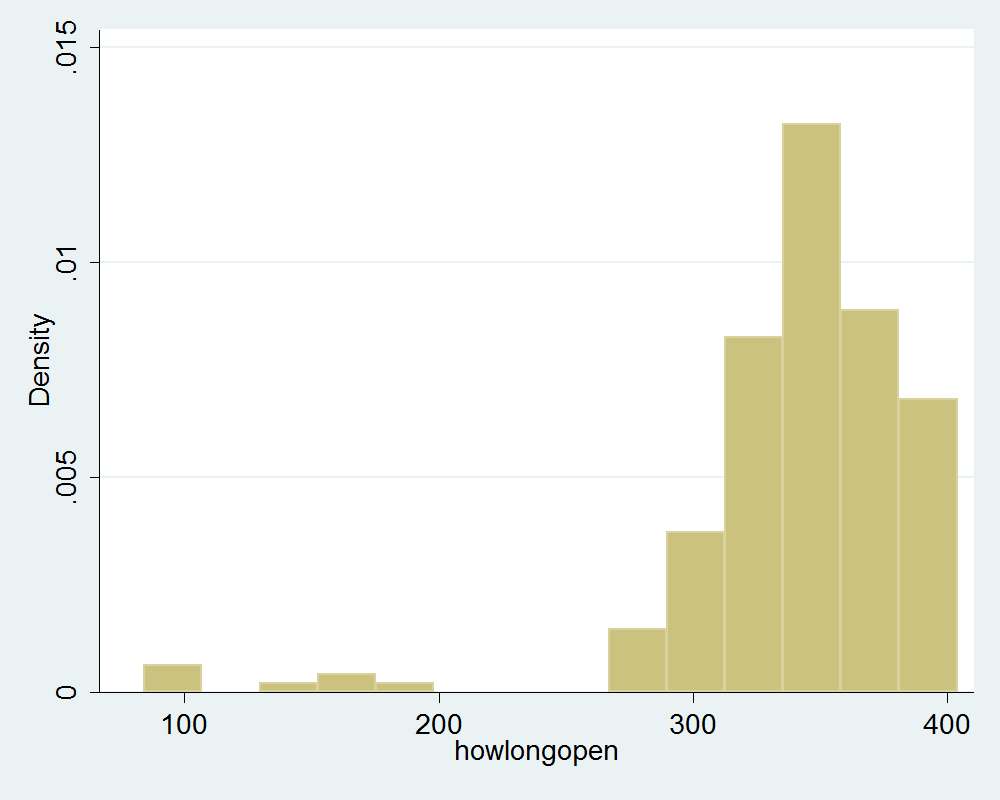

In [11]:
%%stata --graph
tab zerototbal if call==1
summ howlongopen
hist howlongopen

In [12]:
%%stata
tab active if call==1,summ( nonseedbalchange)
summ nonseedbalchange,detail
tab active active_treat if call==1


     Active |     Summary of nonseedbalchange
    account |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   105.73035   4714.6168        1145
          1 |   370.66207   2928.8638         632
------------+------------------------------------
      Total |    199.9548   4169.1327        1777

                      nonseedbalchange
-------------------------------------------------------------
      Percentiles      Smallest
 1%     -1506.14       -4541.77
 5%      -947.57       -2168.88
10%      -500.94        -2138.5       Obs                3152
25%     -255.515       -2114.25       Sum of Wgt.        3152

50%       -81.16                      Mean           133.8924
                        Largest       Std. Dev.      3287.174
75%            0       30921.14
90%       115.06       52460.47       Variance       1.08e+07
95%       870.87       100067.1       Skewness       24.70557
99%      5866.63         114001       Kurtosis    


(bin=32, start=-2168.8799, width=145.59624)
  201

savedathome |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,426       80.25       80.25
          1 |        351       19.75      100.00
------------+-----------------------------------
      Total |      1,777      100.00


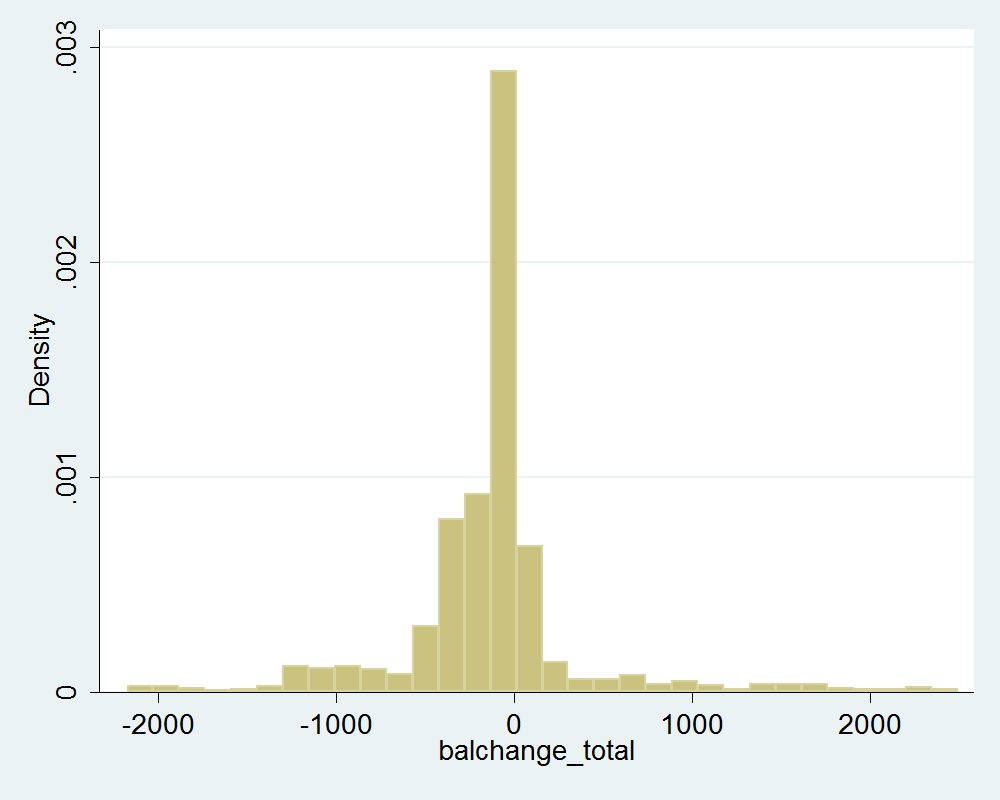

In [13]:
%%stata --graph
hist balchange_total if balchange <2500
count if balchange_total==0
tab savedathome

In [14]:
%%stata
tab active if call==1, summ(time_acct_tot)
tab active,summ (housedebt)


     Active |      Summary of time_acct_tot
    account |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   19.213974   650.15954        1145
          1 |   15.822785   397.77864         632
------------+------------------------------------
      Total |   18.007878     573.153        1777

            |   Summary of total household debt
            |  (amount owed on dwelling, loans,
     Active |     agricultural assets and re
    account |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   18896.648    75069.07        2125
          1 |   12595.804   48363.039        1028
------------+------------------------------------
      Total |   16842.329    67588.91        3153


In [32]:
%%stata
tab active seedtakeup if call==1
tab active seedtakeup if call==1,summ(balchange)


    Active |     SEED take up
   account |         0          1 |     Total
-----------+----------------------+----------
         0 |     1,009        136 |     1,145 
         1 |       566         66 |       632 
-----------+----------------------+----------
     Total |     1,575        202 |     1,777 


                Means, Standard Deviations and Frequencies
                  of Change in total savings held at bank

    Active |    SEED take up
   account |         0          1 |     Total
-----------+----------------------+----------
         0 | 94.116509  908.01279 | 190.78891
           | 4834.5791  7223.3173 | 5178.9086
           |      1009        136 |      1145
-----------+----------------------+----------
         1 | 379.61849  1313.6483 | 477.15959
           | 2968.6202  3238.7227 | 3008.8488
           |       566         66 |       632
-----------+----------------------+----------
     Total | 196.71595  1040.5472 | 292.63824
           | 4260.3395  6202.5993 |

In [33]:
%%stata
tab group active,summ(balchange)


                Means, Standard Deviations and Frequencies
                  of Change in total savings held at bank

           |   Active account
     group |         0          1 |     Total
-----------+----------------------+----------
         C | -81.54299  301.87018 | 43.575771
           | 1244.8123  3496.8758 | 2248.5158
           |       545        264 |       809
-----------+----------------------+----------
         M |-18.270314  478.89511 | 150.86844
           | 1339.7333  2709.9326 |  1931.619
           |       512        264 |       776
-----------+----------------------+----------
         T | 225.59401  386.63116 | 276.94514
           | 5360.6638  1981.0306 | 4563.1934
           |      1068        500 |      1568
-----------+----------------------+----------
     Total | 88.065447  388.55799 | 186.03764
           | 3909.5162  2631.1481 | 3546.1206
           |      2125       1028 |      3153


### Decile plots

This isn't quite the Decile plots on page 661 but close

In [34]:
%%stata
xtile decile = balchange if call==1, n(10)
tab decile group if call==1, summ(balchange)


                Means, Standard Deviations and Frequencies
                  of Change in total savings held at bank

        10 |
 quantiles |
        of |             group
balchange  |         C          M          T |     Total
-----------+---------------------------------+----------
         1 |-1120.4232 -994.66139 -986.56178 |-1035.6207
           | 449.23924  353.19363  346.42548 | 390.14235
           |        63         43         73 |       179
-----------+---------------------------------+----------
         2 | -336.8518 -340.81136  -369.2864 |-352.69417
           | 83.117129  82.913023  90.475814 | 87.534972
           |        72         59        111 |       242
-----------+---------------------------------+----------
         3 |-240.94806    -232.93 -225.79961 |-231.92044
           | 29.195496  31.587574  28.978035 | 30.185034
           |        31         32         51 |       114
-----------+---------------------------------+----------
         4 |-146.92694 -14